In [405]:
import math

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.interpolate import interp1d
import seaborn as sns

from scipy.stats import linregress

import PythonGraphMod

In [406]:
# import data from ods files
low_f_df = pd.read_excel("../data/low_f.ods")
hight_f_df = pd.read_excel("../data/hight_f.ods")

def kxi(U, I, f):
    return 1000*U/(I * f)

low_f = np.array(low_f_df['f, Гц'])
low_U = np.array(low_f_df['U, В'])
low_I = np.array(low_f_df['I, мА'])

hight_f = np.array(hight_f_df['f, Гц'])
hight_U = np.array(hight_f_df['U, В'])
hight_I = np.array(hight_f_df['I, мА'])
Delta_Psi = np.array(hight_f_df['Delta_Psi'])
Psi_err = np.array(hight_f_df['Psi_err'])

sqrt_f = np.concatenate((np.sqrt(low_f), np.sqrt(hight_f)), axis=0, out=None, dtype=None)
sqr_f = np.concatenate((np.square(low_f), np.square(hight_f)), axis=0, out=None, dtype=None)

low_kxi = kxi(low_U, low_I, low_f)
hight_kxi = kxi(hight_U, hight_I, hight_f)
kxi0c = np.concatenate((low_kxi, hight_kxi), axis=0, out=None, dtype=None)

slope stderr: 0.000305
intersept stderr: 0.037664
Delta_Psi y0 = 0.750395
slope = 0.021446


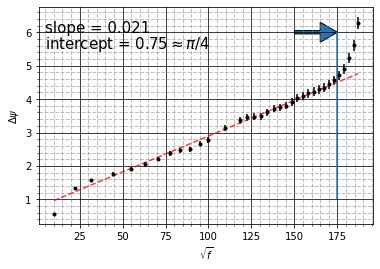

In [407]:

lin_Psi = linregress(np.sqrt(hight_f[1:-5:1]), Delta_Psi[1:-5:1])

print('slope stderr: %f' %lin_Psi.stderr)
print('intersept stderr: %f' %lin_Psi.intercept_stderr)

fig1, ax1 = PythonGraphMod.CreateSimpleGraph()
ax1.minorticks_on()

plt.errorbar(np.sqrt(hight_f), Delta_Psi, yerr=Psi_err, fmt='.', ecolor='black', color='black')
ax1.scatter(np.sqrt(hight_f), Delta_Psi, color='black', marker='o', s=2, alpha=1)
ax1.plot(np.sqrt(hight_f), lin_Psi.intercept + lin_Psi.slope * np.sqrt(hight_f), color='red', alpha=0.75, lw=1.5, ls='--')

print('Delta_Psi y0 = %f' %lin_Psi.intercept)
print('slope = %f' %lin_Psi.slope)

ax1.arrow(150, 6, 25, 0,
         length_includes_head = True,
         width = 0.1,
         head_width = 0.6,
         head_length = 10)

# вертикальная линия
# параметры: координата по x, y_min, y_max
ax1.vlines(175, 1, 6, ls='-')

ax1.minorticks_on()
ax1.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax1.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

ax1.text(5, 6, 'slope = ' + str(round(lin_Psi.slope, 3)), size = 15)
ax1.text(5, 5.5, 'intercept = ' + str(round(lin_Psi.intercept, 3)) + r'$\approx \pi/4$', size = 15)
plt.ylabel(r'$\Delta \psi$')
plt.xlabel(r'$\sqrt{f}$')
# plt.title (r'График зависимости $\Delta \psi (\sqrt{\nu})$')

fig1.savefig("../images/DeltaPsi.pdf")

Таким образом по полученной зависимости $$\Delta \psi = \frac{\pi}{4} + \frac{h \sqrt{\mu_0 \sigma \omega}}{\sqrt{2}}$$ можно определить проводимость меди. В нашем плучае $$\sigma = 5.178 \cdot 10^7$$
Проводимость меди так же можно расчитать по формуле $$H_1 = \frac{H_0}{\ch{\alpha h} + 0.5 \alpha a \sh{\alpha h}}$$ где $$\alpha = \frac{1 + i}{\delta}$$

intersept stderr: 0.000037
y0 = 0.019083


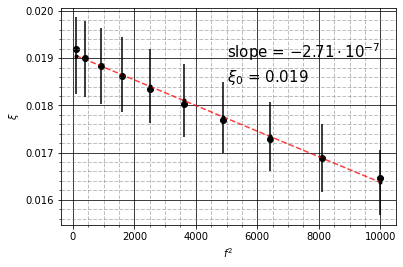

In [408]:
# погрешность xi 4,24%

fig2, ax2 = PythonGraphMod.CreateSimpleGraph()

lin_low_kxi = linregress(np.square(low_f), low_kxi)

print('intersept stderr: %f' %lin_low_kxi.intercept_stderr)

kxi0c = lin_low_kxi.intercept + lin_low_kxi.slope * np.square(low_f)

ax2.scatter(np.square(low_f), low_kxi, c = 'black', marker = 'o')
ax2.plot(np.square(low_f), kxi0c, color='red', alpha=.75, lw=1.5, ls='--')
plt.errorbar(np.square(low_f), kxi0c, yerr=0.0424*kxi0c, fmt='.', ecolor='black', color='black')

kxi0 = lin_low_kxi.intercept
print('y0 = %f' %kxi0)

ax2.minorticks_on()
ax2.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax2.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

ax2.text(5000, 0.019, r'slope = $-2.71 \cdot 10^{-7}$', size = 15)
ax2.text(5000, 0.0185, r'$\xi_0$ = ' + str(round(lin_low_kxi.intercept, 3)), size = 15)
plt.ylabel(r'$\xi$')
plt.xlabel(r'$f^2$')
# plt.title (r'График зависимости $\xi_{0c} (\nu^2)$')
plt.show()

fig2.savefig("../images/xi0c(1).pdf")

y0 = 2725.041151


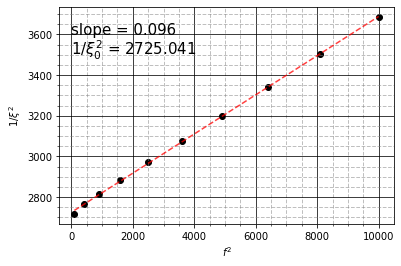

In [409]:
fig9, ax9 = PythonGraphMod.CreateSimpleGraph()

delta_kxi = 0.0424

lin_low_kxi1 = linregress(np.square(low_f), 1/(low_kxi*low_kxi))

def kxi2_err(kxi):
    return 2*delta_kxi/np.square(kxi)

ax9.scatter(np.square(low_f), 1/(low_kxi*low_kxi), c = 'black', marker = 'o')
ax9.plot(np.square(low_f), lin_low_kxi1.intercept + lin_low_kxi1.slope * np.square(low_f), color='red', alpha=.75, lw=1.5, ls='--')
# plt.errorbar(np.square(low_f), 
#              lin_low_kxi1.intercept + lin_low_kxi1.slope * np.square(low_f), 
#              yerr=kxi2_err(low_kxi), 
#              fmt='.', 
#              ecolor='black', 
#              color='black')

kxi01 = lin_low_kxi1.intercept
print('y0 = %f' %kxi01)

ax9.minorticks_on()
ax9.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax9.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

ax9.text(0, 3600, 'slope = ' + str(round(lin_low_kxi1.slope, 3)), size = 15)
ax9.text(0, 3500, r'$1/\xi_0^2$ = ' + str(round(lin_low_kxi1.intercept, 3)), size = 15)
plt.ylabel(r'$1/\xi^2$')
plt.xlabel(r'$f^2$')
# plt.title (r'График зависимости $1/\xi_{0c}^2 (\nu^2)$')
plt.show()

fig9.savefig("../images/xi0c(2).pdf")

# Погрешности

Относительная погрешность величины $$\xi$$ $$\delta_{\xi} = 4.24 \%$$
Абсолютная погрешность $$\frac{1}{\xi^2}$$ $$\sigma = \frac{2 \delta_{\xi}}{\xi^2}$$

Построили зависимость $$\xi_{0c}(\nu^2)$$ на низких частотах. По точке пересечения с осью ординат определили $$\xi_0 = 0.019083$$ амплитуду внешнего поля.

Далее, коэффициент ослабления магнитного поля $$\frac{|H_{0c}|}{|H_0|}$$ можно найти по формуле $$\frac{|H_{0c}|}{|H_0|} = \frac{\xi_{0c}(\nu)}{\xi_0}$$ 

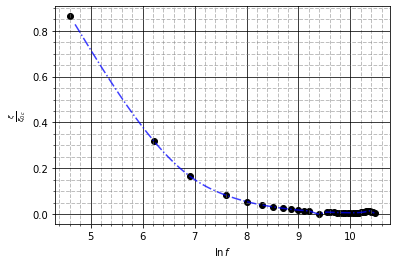

In [410]:
kxi0_err = 0.000037

fig3, ax3 = PythonGraphMod.CreateSimpleGraph()

def kxi_kxi0(kxi):
    return kxi/kxi0

def stderr_kxi_kxi0(kxi):
    return np.sqrt(kxi0_err*kxi0_err + np.square(0.0424*kxi))

x, y = PythonGraphMod.InterpolateSet(np.log(hight_f), kxi_kxi0(kxi(hight_U, hight_I, hight_f)), 'cubic', 4.7, 10.46)

# в логарифмическом масштабе
ax3.scatter(np.log(hight_f), kxi_kxi0(kxi(hight_U, hight_I, hight_f)), c = 'black', marker = 'o')
ax3.plot(x, y, color='blue', alpha=.75, lw=1.5, ls='-.')
# plt.errorbar(np.log(hight_f), kxi_kxi0(kxi(hight_U, hight_I, hight_f)), 
#              yerr=stderr_kxi_kxi0(kxi(hight_U, hight_I, hight_f)), 
#              fmt='.', ecolor='black', color='black')

ax3.minorticks_on()
ax3.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax3.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

plt.ylabel(r'$\frac{\xi}{\xi_{0c}}$')
plt.xlabel(r'$\ln{f}$')
# plt.title (r'График зависимости $\frac{\xi}{\xi_{0c}}(\ln{\nu})$')
plt.show()

fig3.savefig("../images/xi_xi0(log).pdf")


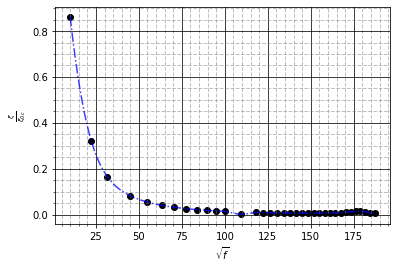

In [411]:

fig6, ax6 = PythonGraphMod.CreateSimpleGraph()

x1, y1 = PythonGraphMod.InterpolateSet(np.sqrt(hight_f), kxi_kxi0(kxi(hight_U, hight_I, hight_f)), 'cubic', 10, 187)

ax6.scatter(np.sqrt(hight_f), kxi_kxi0(kxi(hight_U, hight_I, hight_f)), c = 'black', marker = 'o')
ax6.plot(x1, y1, color='blue', alpha=.75, lw=1.5, ls='-.')

ax6.minorticks_on()
ax6.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax6.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

plt.ylabel(r'$\frac{\xi}{\xi_{0c}}$')
plt.xlabel(r'$\sqrt{f}$')
# plt.title (r'График зависимости $\frac{\xi}{\xi_{0c}}(\sqrt{\nu})$')
plt.show()

fig6.savefig("../images/xi_xi0(sqrt).pdf")

In [412]:
def low_H(f):
    A = 1/4 * (2*pi*a*h*sigma*mu0*f)*(2*pi*a*h*sigma*mu0*f)
    return 1/(np.sqrt(1 + A))

def hight_H(f):
    return (2*math.sqrt(2)*delta(f)/a)*np.exp(-h/delta(f))

Полученное соотношение $$\frac{\xi_{0c}}{\xi_0}$$ даст нам эксперементальную зависимость $$\frac{|H_{0c}|}{|H_0|}$$ кроме того, можно получить теоретическую зависимость, используя формулу $$H_1 = \frac{H_0}{\ch{\alpha h} + 0.5 \alpha a \sh{\alpha h}}$$ где $$\alpha = \frac{1 + i}{\delta}$$

Стоит воспользоваться приближением при низких и высоких частотах. При низких частотах выражение приближается формулой $$\frac{|H_1|}{|H_0|} = \frac{1}{\sqrt{1 + \frac{1}{4} (2 \pi a h \sigma \mu_0 \nu)^2}}$$

При высоких частотах $$\frac{|H_1|}{|H_0|} = \frac{2 \sqrt{2} \delta}{a} e^{-\frac{h}{\delta}}$$

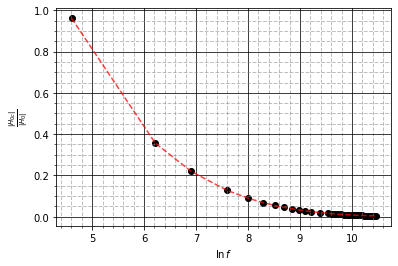

In [413]:
a = 0.025 # meters
h = 0.0015 # meters
sigma = 5.178e7
mu0 = 12.57e-7
pi = math.pi

def delta(f):
    return np.sqrt(2/(pi*mu0*sigma*f))

def k(f):
    return (1 + 1j)/delta(f)

# def low_H(f):
#     return 1 - (4*pi*pi*f*f*(mu0*sigma*a*h)*(mu0*sigma*a*h))/8

# def hight_H(f):
#     z = (1 - 1j)*(delta(f)/(2*a))*(1/np.exp(k(f)*h))
#     return np.abs(z)

frequency = np.concatenate((low_f, hight_f), axis=0, out=None, dtype=None)
H = np.concatenate((low_H(low_f), hight_H(hight_f)), axis=0, out=None, dtype=None)

fig4, ax4 = PythonGraphMod.CreateSimpleGraph()

ax4.scatter(np.log(hight_f), hight_H(hight_f), c = 'black', marker = 'o')
plt.plot(np.log(hight_f), hight_H(hight_f), color='red', alpha=.75, lw=1.5, ls='--')

ax4.minorticks_on()
ax4.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax4.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

plt.ylabel(r'$\frac{|H_{0c}|}{|H_0|}$')
plt.xlabel(r'$\ln{f}$')
# plt.title (r'График зависимости $\frac{|H_{0c}|}{|H_0|}(\ln{\nu})$')
plt.show()

fig4.savefig("../images/H_H0(log).pdf")

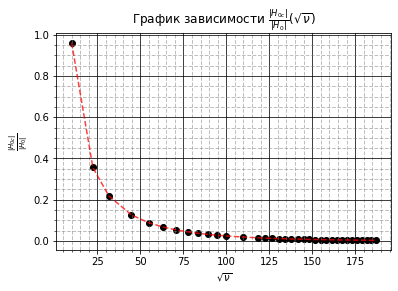

In [414]:
fig7, ax7 = PythonGraphMod.CreateSimpleGraph()

ax7.scatter(np.sqrt(hight_f), hight_H(hight_f), c = 'black', marker = 'o')
plt.plot(np.sqrt(hight_f), hight_H(hight_f), color='red', alpha=.75, lw=1.5, ls='--')

ax7.minorticks_on()
ax7.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax7.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

plt.ylabel(r'$\frac{|H_{0c}|}{|H_0|}$')
plt.xlabel(r'$\sqrt{\nu}$')
plt.title (r'График зависимости $\frac{|H_{0c}|}{|H_0|}(\sqrt{\nu})$')
plt.show()

fig7.savefig("../images/H_H0(sqrt).pdf")

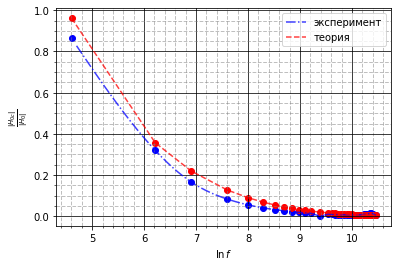

In [415]:
fig5, ax5 = PythonGraphMod.CreateSimpleGraph()

ax5.scatter(np.log(hight_f), kxi_kxi0(kxi(hight_U, hight_I, hight_f)), c = 'blue', marker = 'o')
ax5.plot(x, y, color='blue', alpha=.75, lw=1.5, ls='-.', label='эксперимент')
ax5.scatter(np.log(hight_f), hight_H(hight_f), c = 'red', marker = 'o')
plt.plot(np.log(hight_f), hight_H(hight_f), color='red', alpha=.75, lw=1.5, ls='--', label='теория')


ax5.minorticks_on()
ax5.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax5.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

plt.ylabel(r'$\frac{|H_{0c}|}{|H_0|}$')
plt.xlabel(r'$\ln{f}$')
# plt.title (r'График зависимости $\frac{|H_{0c}|}{|H_0|}(\ln{\nu})$')
plt.legend(loc="upper right")
plt.show()

fig5.savefig("../images/exp_th(log).pdf")

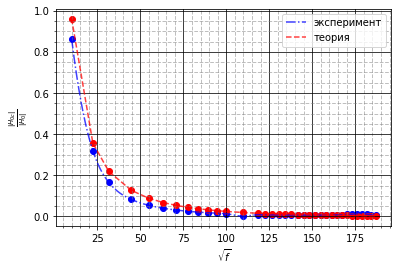

In [416]:
fig8, ax8 = PythonGraphMod.CreateSimpleGraph()

ax8.scatter(np.sqrt(hight_f), kxi_kxi0(kxi(hight_U, hight_I, hight_f)), c = 'blue', marker = 'o')
ax8.plot(x1, y1, color='blue', alpha=.75, lw=1.5, ls='-.', label='эксперимент')
ax8.scatter(np.sqrt(hight_f), hight_H(hight_f), c = 'red', marker = 'o')
plt.plot(np.sqrt(hight_f), hight_H(hight_f), color='red', alpha=.75, lw=1.5, ls='--', label='теория')


ax8.minorticks_on()
ax8.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax8.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

plt.ylabel(r'$\frac{|H_{0c}|}{|H_0|}$')
plt.xlabel(r'$\sqrt{f}$')
# plt.title (r'График зависимости $\frac{|H_{0c}|}{|H_0|}(\sqrt{\nu})$')
plt.legend(loc="upper right")
plt.show()

fig8.savefig("../images/exp_th(sqrt).pdf")